In [ ]:
!pip install plotly
!pip install vega_datasets

In [6]:
pip install vega_datasets

     ---------------------------------------- 0.0/210.8 kB ? eta -:--:--
     - -------------------------------------- 10.2/210.8 kB ? eta -:--:--
     - -------------------------------------- 10.2/210.8 kB ? eta -:--:--
     ----- ------------------------------- 30.7/210.8 kB 187.9 kB/s eta 0:00:01
     ------- ----------------------------- 41.0/210.8 kB 196.9 kB/s eta 0:00:01
     ---------- -------------------------- 61.4/210.8 kB 233.8 kB/s eta 0:00:01
     ------------ ------------------------ 71.7/210.8 kB 245.8 kB/s eta 0:00:01
     ------------------- ---------------- 112.6/210.8 kB 344.8 kB/s eta 0:00:01
     ------------------------ ----------- 143.4/210.8 kB 387.0 kB/s eta 0:00:01
     ----------------------------- ------ 174.1/210.8 kB 419.0 kB/s eta 0:00:01
     ------------------------------------ 210.8/210.8 kB 459.0 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [7]:
import pandas as pd
import numpy as np
import dateutil
import datetime
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import numpy as np
import pandas as pd
import altair as alt
from vega_datasets import data
from plotly.subplots import make_subplots
import plotly.express as px
import json

#only in jupyter notebook need plotly offline mode
#I still got some error when using Jupyterlab
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
init_notebook_mode(connected=True)


# Data cleaning and plot testing for flask dashboard <a name="main"></a>



### Table of contents
* [1. Get country-grouped and global time series data frame](#ch1)
* [2. Altair Plot](#ch2)
* [3. Plotly Plot](#ch3)
* [4. Put all of it into functions ](#ch4)

In [8]:

#loading data
total_confirmed=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv',encoding='utf-8',na_values=None)
#Replace US with United States
total_confirmed.replace(to_replace='US', value='United States', regex=True, inplace=True)
total_death=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv',encoding='utf-8',na_values=None)
total_death.replace(to_replace='US', value='United States', regex=True, inplace=True)
total_recovered=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv',encoding='utf-8',na_values=None)
total_recovered.replace(to_replace='US', value='United States', regex=True, inplace=True)

In [9]:
total_confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288


## 1. Get country-grouped  and global time series data frame<a name="ch1"></a>

In [10]:
#grouped total confirmed data
grouped_total_confirmed = total_confirmed[["Country/Region",total_confirmed.columns[-1]]].groupby("Country/Region").sum().sort_values(by=total_confirmed.columns[-1], ascending=False)
grouped_total_confirmed.reset_index(inplace=True)
grouped_total_confirmed.columns=["Country/Region", 'confirmed']
grouped_total_confirmed.replace(to_replace='US', value='United States', regex=True, inplace=True)

#Chart.js can't plot dataframe object, so we need to change some to list
barplot_confirmed_values=grouped_total_confirmed["confirmed"].values.tolist()
country_names=grouped_total_confirmed["Country/Region"].values.tolist()
grouped_total_confirmed

,Country/Region,confirmed
0,United States,103802702
1,India,44690738
2,France,39866718
3,Germany,38249060
4,Brazil,37076053
...,...,...
196,Winter Olympics 2022,535
197,Holy See,29
198,Antarctica,11
199,MS Zaandam,9


In [11]:
#global time series confirmed data frame
global_confirmed_timeseries = pd.DataFrame(total_confirmed[total_confirmed.columns[4:]].sum())
global_confirmed_timeseries.reset_index(inplace=True)
global_confirmed_timeseries.columns= ['date', 'total confirmed']

#global daily new cases = global daily confirmed at date (t) -  global daily confirmed at date (t-1)
global_confirmed_timeseries["daily new cases"] = global_confirmed_timeseries['total confirmed'] - global_confirmed_timeseries['total confirmed'].shift()
global_confirmed_timeseries=global_confirmed_timeseries.fillna(0)
global_confirmed_timeseries

,date,total confirmed,daily new cases
0,1/22/20,557,0.0
1,1/23/20,657,100.0
2,1/24/20,944,287.0
3,1/25/20,1437,493.0
4,1/26/20,2120,683.0
...,...,...,...
1138,3/5/23,676024901,56126.0
1139,3/6/23,676082941,58040.0
1140,3/7/23,676213378,130437.0
1141,3/8/23,676392824,179446.0


In [12]:
#grouped total recovered data
grouped_total_recovered = total_recovered[["Country/Region",total_recovered.columns[-1]]].groupby("Country/Region").sum().sort_values(by=total_recovered.columns[-1], ascending=False)
grouped_total_recovered.reset_index(inplace=True)
grouped_total_recovered.columns=["Country/Region", 'recovered']
grouped_total_recovered.replace(to_replace='US', value='United States', regex=True, inplace=True)

#Chart.js can't plot dataframe object, so we need to change some to list
barplot_recovered_values=grouped_total_recovered["recovered"].values.tolist()
country_names=grouped_total_confirmed["Country/Region"].values.tolist()
grouped_total_recovered

,Country/Region,recovered
0,Afghanistan,0
1,Panama,0
2,Netherlands,0
3,New Zealand,0
4,Nicaragua,0
...,...,...
196,Grenada,0
197,Guatemala,0
198,Guinea,0
199,Guinea-Bissau,0


In [13]:
#global time series recovered data frame
global_recovered_timeseries = pd.DataFrame(total_recovered[total_recovered.columns[4:]].sum())
global_recovered_timeseries.reset_index(inplace=True)
global_recovered_timeseries.columns= ['date', 'total recovered']

#global daily recovered = global daily recovered at date (t) -  global daily recovered at date (t-1)
global_recovered_timeseries["daily new recovered"] = global_recovered_timeseries['total recovered'] - global_recovered_timeseries['total recovered'].shift()
global_recovered_timeseries=global_recovered_timeseries.fillna(0)
global_recovered_timeseries

,date,total recovered,daily new recovered
0,1/22/20,30,0.0
1,1/23/20,32,2.0
2,1/24/20,39,7.0
3,1/25/20,42,3.0
4,1/26/20,56,14.0
...,...,...,...
1138,3/5/23,0,0.0
1139,3/6/23,0,0.0
1140,3/7/23,0,0.0
1141,3/8/23,0,0.0


In [14]:
# grouping the data by each country to get total confirmed cases
grouped_total_death = total_death[["Country/Region",total_death.columns[-1]]].groupby("Country/Region").sum().sort_values(by=total_death.columns[-1], ascending=False)
grouped_total_death.reset_index(inplace=True)
grouped_total_death.columns=["Country/Region", 'deaths']
grouped_total_death.replace(to_replace='US', value='United States', regex=True, inplace=True)

#Chart.js can't plot dataframe object, so we need to change some to list
barplot_death_values=grouped_total_death["deaths"].values.tolist()
global_death_timeseries = total_death[total_death.columns[4:]].sum()

In [15]:
#global time series death data frame
global_death_timeseries = pd.DataFrame(total_death[total_death.columns[4:]].sum())
global_death_timeseries.reset_index(inplace=True)
global_death_timeseries.columns= ['date', 'total deaths']

#global daily deaths = global daily deaths at date (t) -  global daily deaths at date (t-1)
global_death_timeseries["daily new deaths"] = global_death_timeseries['total deaths'] - global_death_timeseries['total deaths'].shift()
global_death_timeseries=global_death_timeseries.fillna(0)
global_death_timeseries


,date,total deaths,daily new deaths
0,1/22/20,17,0.0
1,1/23/20,18,1.0
2,1/24/20,26,8.0
3,1/25/20,42,16.0
4,1/26/20,56,14.0
...,...,...,...
1138,3/5/23,6877749,148.0
1139,3/6/23,6878115,366.0
1140,3/7/23,6879038,923.0
1141,3/8/23,6880483,1445.0


In [16]:
#merge all the data to get full time series dataframe
timeseries_final=pd.merge(global_confirmed_timeseries,global_recovered_timeseries,how='inner',on='date')
timeseries_final = pd.merge(timeseries_final,global_death_timeseries,how='inner',on='date')
timeseries_final

,date,total confirmed,daily new cases,total recovered,daily new recovered,total deaths,daily new deaths
0,1/22/20,557,0.0,30,0.0,17,0.0
1,1/23/20,657,100.0,32,2.0,18,1.0
2,1/24/20,944,287.0,39,7.0,26,8.0
3,1/25/20,1437,493.0,42,3.0,42,16.0
4,1/26/20,2120,683.0,56,14.0,56,14.0
...,...,...,...,...,...,...,...
1138,3/5/23,676024901,56126.0,0,0.0,6877749,148.0
1139,3/6/23,676082941,58040.0,0,0.0,6878115,366.0
1140,3/7/23,676213378,130437.0,0,0.0,6879038,923.0
1141,3/8/23,676392824,179446.0,0,0.0,6880483,1445.0


In [17]:
# total confirmed cases globally
total_confirmed[total_confirmed.columns[-1]].sum()

676570149

In [18]:
# total recovered cases globally
total_recovered[total_recovered.columns[-1]].sum()


0

In [19]:
# total recovered cases globally
total_death[total_death.columns[-1]].sum()

6881802

In [20]:
# I need data that contain population for each country to calculate confirmed cases/population
# I download it from : https://github.com/samayo/country-json/blob/master/src/country-by-population.json
df_pop = pd.read_json('https://raw.githubusercontent.com/samayo/country-json/master/src/country-by-population.json')
df_pop

,country,population
0,Afghanistan,37172386
1,Albania,2866376
2,Algeria,42228429
3,American Samoa,55465
4,Andorra,77006
...,...,...
240,Wallis and Futuna,15289
241,Western Sahara,652271
242,Yemen,28498687
243,Zambia,17351822


In [21]:
#some country name has different  format, so I need to change it to match my first dataset
df_pop.columns=['Country/Region','population']
df_pop=df_pop.replace(to_replace='Russian Federation', value='Russia')


In [22]:
# I also need country code for geographical analysis, Altair need numerical code and Plotly need alfabetical code
#country code and id for later geographical analysis
url = "https://gist.githubusercontent.com/komasaru/9303029/raw/9ea6e5900715afec6ce4ff79a0c4102b09180ddd/iso_3166_1.csv"
country_code = pd.read_csv(url)
country_code = country_code[["English short name","Alpha-3 code","Numeric"]]
country_code.columns=["Country/Region", "code3", "id"]

#Change the data for later merging
#If not match the value will be deleted, so we need to make sure each country name from each table has same value
country_code=country_code.replace(to_replace='Russian Federation (the)', value='Russia')
country_code=country_code.replace(to_replace='United Kingdom (the)', value='United Kingdom')
country_code=country_code.replace(to_replace='United States (the)', value='United States')
country_code=country_code.replace(to_replace='Viet Nam', value='Vietnam')
country_code

,Country/Region,code3,id
0,Afghanistan,AFG,4
1,Åland Islands,ALA,248
2,Albania,ALB,8
3,Algeria,DZA,12
4,American Samoa,ASM,16
...,...,...,...
244,Wallis and Futuna,WLF,876
245,Western Sahara*,ESH,732
246,Yemen,YEM,887
247,Zambia,ZMB,894


In [23]:
# merge them all
final_df=pd.merge(grouped_total_confirmed,grouped_total_recovered,how='inner',on='Country/Region')
final_df=pd.merge(final_df,grouped_total_death,how='inner',on='Country/Region')
final_df=pd.merge(final_df,df_pop,how='inner',on='Country/Region')
final_df=pd.merge(country_code,final_df,how='inner',on='Country/Region')
final_df = final_df.sort_values(by="confirmed", ascending=False)
final_df.reset_index(inplace=True, drop=True)
final_df.to_json("new_map.json")
final_df

,Country/Region,code3,id,confirmed,recovered,deaths,population
0,United States,USA,840,103802702,0,1123836,326687501
1,India,IND,356,44690738,0,530779,1352617328
2,France,FRA,250,39866718,0,166176,66977107
3,Germany,DEU,276,38249060,0,168935,82905782
4,Brazil,BRA,76,37076053,0,699276,209469333
...,...,...,...,...,...,...,...
154,Palau,PLW,585,5991,0,9,17907
155,Nauru,NRU,520,5247,0,1,12704
156,Kiribati,KIR,296,5014,0,18,115847
157,Tuvalu,TUV,798,2805,0,0,11508


In [24]:
# calculate cases/million and total death rate
final_df['cases/million'] = ((final_df['confirmed']/final_df['population'])*1000000).round(2)
final_df['death rate(%)'] = ((final_df['deaths']/final_df['confirmed'])*100).round(2)
final_df

,Country/Region,code3,id,confirmed,recovered,deaths,population,cases/million,death rate(%)
0,United States,USA,840,103802702,0,1123836,326687501,317743.11,1.08
1,India,IND,356,44690738,0,530779,1352617328,33040.19,1.19
2,France,FRA,250,39866718,0,166176,66977107,595229.02,0.42
3,Germany,DEU,276,38249060,0,168935,82905782,461355.76,0.44
4,Brazil,BRA,76,37076053,0,699276,209469333,176999.91,1.89
...,...,...,...,...,...,...,...,...,...
154,Palau,PLW,585,5991,0,9,17907,334561.90,0.15
155,Nauru,NRU,520,5247,0,1,12704,413019.52,0.02
156,Kiribati,KIR,296,5014,0,18,115847,43281.22,0.36
157,Tuvalu,TUV,798,2805,0,0,11508,243743.48,0.00


In [25]:
country = "Indonesia"
total_all_confirmed = total_confirmed.groupby("Country/Region").sum()
total_all_confirmed.reset_index(inplace=True)
mask = (total_all_confirmed['Country/Region'] == country) 
total_all_confirmed=total_all_confirmed.loc[mask]
total_all_confirmed = total_all_confirmed[total_all_confirmed.columns[-1]].sum()
total_all_confirmed

6738225

In [26]:
# function to filter timeseries analysis by country
# I use "case" variable just for column name: e.g, case = confirmed, case = deaths
def get_by_country(df, country, case):
    mask = (df['Country/Region'] == country) 
    df = df.loc[mask]
    df_country = df.groupby("Country/Region").sum()
    df_country = pd.DataFrame(df[df.columns[4:]].sum())
    df_country.reset_index(inplace=True)
    df_country.columns=['date', f"value_{case}"]
    df_country[f"daily_new_{case}"] = df_country[f"value_{case}"] - df_country[f"value_{case}"].shift()
    df_country=df_country.fillna(0)
    return df_country


#use function above to get merged dataframe
def get_by_country_merged(total_confirmed, total_death, total_recovered, country):
    #apply to each timeseries
    country_confirmed_tseries = get_by_country(total_confirmed, country, "confirmed" )
    country_death_tseries = get_by_country(total_death, country, "death" )
    country_recovered_tseries = get_by_country(total_recovered, country, "recovered" )
    
    #merge them all
    country_timeseries_final=pd.merge(country_confirmed_tseries,country_death_tseries,how='inner',on='date')
    country_timeseries_final = pd.merge(country_timeseries_final,country_recovered_tseries,how='inner',on='date')
    country_timeseries_final.reset_index(inplace=True)
    return country_timeseries_final

In [27]:
#example for China:
country_tseries = get_by_country(total_confirmed, "China", "confirmed")
# it will give me total confirmed cases per day in US, also I can use this for total_deaths and total_recovered too
country_tseries

,date,value_confirmed,daily_new_confirmed
0,1/22/20,548,0.0
1,1/23/20,643,95.0
2,1/24/20,920,277.0
3,1/25/20,1406,486.0
4,1/26/20,2075,669.0
...,...,...,...
1138,3/5/23,4903524,0.0
1139,3/6/23,4903524,0.0
1140,3/7/23,4903524,0.0
1141,3/8/23,4903524,0.0


In [28]:
#example merged for US:
US_ts = get_by_country_merged(total_confirmed, total_death, total_recovered, "China")
US_ts

,index,date,value_confirmed,daily_new_confirmed,value_death,daily_new_death,value_recovered,daily_new_recovered
0,0,1/22/20,548,0.0,17,0.0,28,0.0
1,1,1/23/20,643,95.0,18,1.0,30,2.0
2,2,1/24/20,920,277.0,26,8.0,36,6.0
3,3,1/25/20,1406,486.0,42,16.0,39,3.0
4,4,1/26/20,2075,669.0,56,14.0,49,10.0
...,...,...,...,...,...,...,...,...
1138,1138,3/5/23,4903524,0.0,101054,1.0,0,0.0
1139,1139,3/6/23,4903524,0.0,101055,1.0,0,0.0
1140,1140,3/7/23,4903524,0.0,101055,0.0,0,0.0
1141,1141,3/8/23,4903524,0.0,101055,0.0,0,0.0


#### Optional for chart.js geographical analysis

* chart.js doesnt have any map/world map chart, so I need to use 3rd party(highcharts), you can skip this part (2 cells below) if you find it confusing

* that 3rd party use this json file as its data, so I need to mimick its structure

In [29]:
# ref : https://www.highcharts.com/demo/maps/tooltip
chartjs_ccode = pd.read_json("https://cdn.jsdelivr.net/gh/highcharts/highcharts@v7.0.0/samples/data/world-population-density.json")
chartjs_ccode

,code3,name,value,code
0,ABW,Aruba,582.34,AW
1,AFG,Afghanistan,53.08,AF
2,AGO,Angola,23.11,AO
3,ALB,Albania,104.97,AL
4,AND,Andorra,164.43,AD
...,...,...,...,...
208,WSM,Samoa,68.95,WS
209,YEM,"Yemen, Rep.",52.25,YE
210,ZAF,South Africa,46.18,ZA
211,ZMB,Zambia,22.32,ZM


In [30]:
#dump it to external json_file
import json
chartjs_map = final_df[["code3", "Country/Region", "confirmed" ]]
chartjs_map.columns = ["code3", "name", "value"]
chart_json = chartjs_map.to_dict('records')

with open('chart_js.json', 'w') as fout:
    json.dump(chart_json, fout)

chart_json

[{'code3': 'USA', 'name': 'United States', 'value': 103802702},
 {'code3': 'IND', 'name': 'India', 'value': 44690738},
 {'code3': 'FRA', 'name': 'France', 'value': 39866718},
 {'code3': 'DEU', 'name': 'Germany', 'value': 38249060},
 {'code3': 'BRA', 'name': 'Brazil', 'value': 37076053},
 {'code3': 'JPN', 'name': 'Japan', 'value': 33320438},
 {'code3': 'ITA', 'name': 'Italy', 'value': 25603510},
 {'code3': 'GBR', 'name': 'United Kingdom', 'value': 24658705},
 {'code3': 'RUS', 'name': 'Russia', 'value': 22075858},
 {'code3': 'TUR', 'name': 'Turkey', 'value': 17042722},
 {'code3': 'ESP', 'name': 'Spain', 'value': 13770429},
 {'code3': 'VNM', 'name': 'Vietnam', 'value': 11526994},
 {'code3': 'AUS', 'name': 'Australia', 'value': 11399460},
 {'code3': 'ARG', 'name': 'Argentina', 'value': 10044957},
 {'code3': 'MEX', 'name': 'Mexico', 'value': 7483444},
 {'code3': 'IDN', 'name': 'Indonesia', 'value': 6738225},
 {'code3': 'POL', 'name': 'Poland', 'value': 6444960},
 {'code3': 'COL', 'name': 'C

### [Back to table of content](#main)

## 2. Altair Plot <a name="ch2"></a>

In [31]:
# Plot Altair 1: Per country total cases and cases/million populations

source = final_df

#base configuration
base = alt.Chart(source).encode(
        alt.X('Country/Region:N',sort=None), tooltip=['Country/Region', 'confirmed', 'cases/million']
).properties( height = 500,
        title='Total Confirmed Cases/Country'
)

#base title configuration

#bar chart
bar = base.mark_bar(color='#5276A7').encode(
    alt.Y('confirmed:Q', axis=alt.Axis(titleColor='#5276A7'))
)
#point for cases/million and its axis
point = base.mark_circle(size=60, color='red').encode(
    alt.Y('cases/million:Q', axis=alt.Axis(titleColor='red'))
)
#merge the plot
alt.layer(bar, point).resolve_scale(y='independent')

alt.LayerChart(...)

In [32]:
# Plot Altair 2: Global aggregates confirmed, recovered, and deaths (Im not using this at my webapp, only for example)
source = timeseries_final

base = alt.Chart(source).encode(x='date:T')

line1 =  base.mark_line(color='green').encode(
    y='total confirmed:Q'
)


line2=  base.mark_line(color='blue').encode(
    y='total recovered:Q'
)
line3=  base.mark_line(color='red').encode(
    y='total deaths:Q'
)
(line1 + line2 + line3).properties(width=600)

alt.LayerChart(...)

In [33]:
#Plot Altair 3: Global time series chart for daily new cases (Im not using this at my webapp, only for example)

source = timeseries_final

base = alt.Chart(source).encode(x='date:T')

line=  base.mark_line(color='blue').encode(
    y='daily new cases:Q', tooltip=['yearmonthdate(date)','daily new cases']
).properties(width=600)

line

alt.Chart(...)

In [34]:
#Plot Altair 3: per country time series chart for daily new cases (Im not using this at my webapp, only for example)
#this example using US_ts from previous function

source = US_ts

base = alt.Chart(source).encode(x='date:T')

line=  base.mark_line(color='blue').encode(
    y='daily_new_confirmed:Q', tooltip=['yearmonthdate(date)','daily_new_confirmed']
).properties(width=600)

line

alt.Chart(...)

In [35]:
#Plot Altair 4: Global time series chart for daily new cases, recovered, and deaths - version 1 (Im not using this at my webapp)
import altair as alt
from vega_datasets import data

source = timeseries_final

base = alt.Chart(source).encode(x='date:T')
base = alt.Chart(source).encode(
        alt.X('date:T'), tooltip=['yearmonthdate(date)','daily new cases', 'daily new recovered', 'daily new deaths']
)

line1 =  base.mark_line(color='green').encode(
    y='daily new cases:Q'
)

line2=  base.mark_line(color='blue').encode(
    y='daily new recovered:Q'
)
line3=  base.mark_line(color='red').encode(
    y='daily new deaths:Q'
)
chart = (line1 + line2 + line3).properties(width=1000)
chart

alt.LayerChart(...)

In [36]:
#Plot ALtair 5: Global time series chart for daily new cases, recovered, and deaths - version 2 (Im not using this at my webapp)
import altair as alt


data = timeseries_final
base = alt.Chart(data).transform_fold(
    ['daily new cases', 'daily new recovered', 'daily new deaths']
)
line = base.mark_line().encode(
    x='date:T',
    y=alt.Y('value:Q', axis=alt.Axis(title='# of cases')),
    color='key:N',
    tooltip=['yearmonthdate(date)','daily new cases', 'daily new recovered', 'daily new deaths']
).properties(width=700)


line

alt.Chart(...)

In [37]:
#Plot Altair 6; Global time series chart for daily new cases, recovered, and deaths - version 3 (more fancy selector)

import altair as alt
import pandas as pd
import numpy as np


#declare data and initialization
data = timeseries_final

#specifying form of data; read: https://altair-viz.github.io/user_guide/data.html#long-form-vs-wide-form-data
base = alt.Chart(data).transform_fold(
    ['daily new cases', 'daily new recovered', 'daily new deaths']
)

# Create a selection that chooses the nearest point & selects based on x-value
nearest = alt.selection(type='single', nearest=True, on='mouseover',
                        fields=['date'], empty='none')

# The basic line
line = base.mark_line().encode(
    x='date:T',
    y=alt.Y('value:Q', axis=alt.Axis(title='# of cases')),
    color='key:N',
    
)

# Transparent selectors across the chart. This is what tells us
# the x-value of the cursor
selectors = base.mark_point().encode(
    x='date:T',
    opacity=alt.value(0),
    tooltip=[ alt.Tooltip('yearmonthdate(date)', title="Date")]
).add_selection(
    nearest
)

# Draw points on the line, and highlight based on selection
points = line.mark_point().encode(
    opacity=alt.condition(nearest, alt.value(1), alt.value(0))
)

# Draw text labels near the points, and highlight based on selection
text = line.mark_text(align='left', dx=5, dy=-5).encode(
    text=alt.condition(nearest, 'value:Q', alt.value(' '))
)

# Draw a rule at the location of the selection
rules = alt.Chart(data).mark_rule(color='gray').encode(
    x='date:T',
    
).transform_filter(
    nearest
)

# Put the five layers into a chart and bind the data
chart = alt.layer(
    line, selectors, points, rules, text
).properties(
    width=900, height=300, title='Global Time Series'
)
chart

C:\Users\sulayako\AppData\Local\Programs\Python\Python312\Lib\site-packages\altair\utils\deprecation.py:65: AltairDeprecationWarning:

'selection' is deprecated.
   Use 'selection_point()' or 'selection_interval()' instead; these functions also include more helpful docstrings.

C:\Users\sulayako\AppData\Local\Programs\Python\Python312\Lib\site-packages\altair\vegalite\v5\api.py:469: AltairDeprecationWarning:

The types 'single' and 'multi' are now
        combined and should be specified using "selection_point()".

C:\Users\sulayako\AppData\Local\Programs\Python\Python312\Lib\site-packages\altair\vegalite\v5\api.py:398: AltairDeprecationWarning:

The value of 'empty' should be True or False.

C:\Users\sulayako\AppData\Local\Programs\Python\Python312\Lib\site-packages\altair\utils\deprecation.py:65: AltairDeprecationWarning:

'add_selection' is deprecated. Use 'add_params' instead.



alt.LayerChart(...)

In [38]:
#Plot Altair 6a; per_country time series chart for daily new cases, recovered, and deaths - version 3 (more fancy selector)
# I use US data
import altair as alt
import pandas as pd
import numpy as np


#declare data and initialization
data = US_ts
#column name: date	value_confirmed	daily_new_confirmed	value_death	daily_new_death	value_recovered	daily_new_recovered

#specifying form of data; read: https://altair-viz.github.io/user_guide/data.html#long-form-vs-wide-form-data
base = alt.Chart(data).transform_fold(
    ['daily_new_confirmed', 'daily_new_recovered', 'daily_new_death']
)

# Create a selection that chooses the nearest point & selects based on x-value
nearest = alt.selection(type='single', nearest=True, on='mouseover',
                        fields=['date'], empty='none')

# The basic line
line = base.mark_line().encode(
    x='date:T',
    y=alt.Y('value:Q', axis=alt.Axis(title='# of cases')),
    color='key:N',
    
)

# Transparent selectors across the chart. This is what tells us
# the x-value of the cursor
selectors = base.mark_point().encode(
    x='date:T',
    opacity=alt.value(0),
    tooltip=[ alt.Tooltip('yearmonthdate(date)', title="Date")]
).add_selection(
    nearest
)

# Draw points on the line, and highlight based on selection
points = line.mark_point().encode(
    opacity=alt.condition(nearest, alt.value(1), alt.value(0))
)

# Draw text labels near the points, and highlight based on selection
text = line.mark_text(align='left', dx=5, dy=-5).encode(
    text=alt.condition(nearest, 'value:Q', alt.value(' '))
)

# Draw a rule at the location of the selection
rules = alt.Chart(data).mark_rule(color='gray').encode(
    x='date:T',
    
).transform_filter(
    nearest
)

# Put the five layers into a chart and bind the data
chart = alt.layer(
    line, selectors, points, rules, text
).properties(
    width=900, height=300
)
chart

C:\Users\sulayako\AppData\Local\Programs\Python\Python312\Lib\site-packages\altair\utils\deprecation.py:65: AltairDeprecationWarning:

'selection' is deprecated.
   Use 'selection_point()' or 'selection_interval()' instead; these functions also include more helpful docstrings.

C:\Users\sulayako\AppData\Local\Programs\Python\Python312\Lib\site-packages\altair\vegalite\v5\api.py:469: AltairDeprecationWarning:

The types 'single' and 'multi' are now
        combined and should be specified using "selection_point()".

C:\Users\sulayako\AppData\Local\Programs\Python\Python312\Lib\site-packages\altair\vegalite\v5\api.py:398: AltairDeprecationWarning:

The value of 'empty' should be True or False.

C:\Users\sulayako\AppData\Local\Programs\Python\Python312\Lib\site-packages\altair\utils\deprecation.py:65: AltairDeprecationWarning:

'add_selection' is deprecated. Use 'add_params' instead.



alt.LayerChart(...)

In [39]:
#Plot Altair 7 geographical analysis; ref : https://github.com/altair-viz/altair/issues/2044
import altair as alt
from vega_datasets import data
world_source = final_df

source = alt.topo_feature(data.world_110m.url, "countries")
background = alt.Chart(source).mark_geoshape(fill="white")

foreground = (
    alt.Chart(source)
    .mark_geoshape(stroke="black", strokeWidth=0.15)
    .encode(
        color=alt.Color(
            "confirmed:N", scale=alt.Scale(scheme="redpurple"), legend=None,
        ),
        tooltip=[
            alt.Tooltip("Country/Region:N", title="Country"),
            alt.Tooltip("confirmed:Q", title="confirmed cases"),
        ],
    
    ).transform_lookup(
        lookup="id",
        from_=alt.LookupData(world_source, "id", ["confirmed", "Country/Region"]),
    )
)

final_map = (
    (background + foreground)
    .configure_view(strokeWidth=0)
    .properties(width=700, height=400)
    .project("naturalEarth1")
)
final_map

alt.LayerChart(...)

### [Back to table of content](#main)

## 3. Plotly plot <a name="ch3"></a>

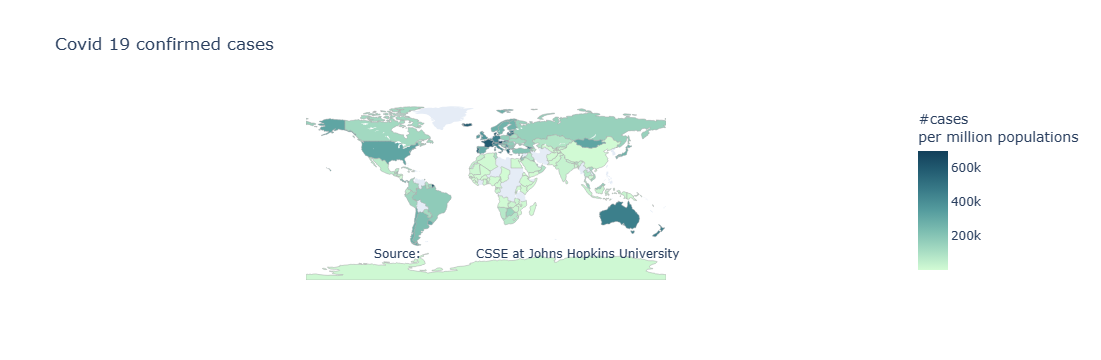

In [40]:
#Plotly plot 1: Geographical analysis



df = final_df

fig = go.Figure(data=go.Choropleth(
    locations = df['code3'],
    z = df['cases/million'],
    text = df['Country/Region'],
    colorscale = 'Darkmint',
    autocolorscale=False,
    reversescale=False,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_tickprefix = '',
    colorbar_title = '#cases <br>per million populations',
))

fig.update_layout(
    title_text='Covid 19 confirmed cases',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ),
    annotations = [dict(
        x=0.55,
        y=0.1,
        xref='paper',
        yref='paper',
        text='Source: <a href="https://github.com/CSSEGISandData/COVID-19">\
            CSSE at Johns Hopkins University</a>',
        showarrow = False
    )]
)

fig.show()

In [41]:
# Plotly plot 2: Per country total cases and cases/million populations

df = final_df
#print(df.head())
df.index = df['Country/Region']
fig = go.Figure()
fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(
  go.Bar(
      x=df.index,
      y=df["confirmed"],
      name="# of confirmed cases",
      marker_color='#39ac39',
      opacity=1
  ),
  secondary_y=False
)

fig.add_trace(
  go.Scatter(
      x=df.index,
      y=df["cases/million"],
      mode="lines",
      name="cases/million",
      marker_color='#b23434',
      opacity=0.7
  ),
  secondary_y=True
)

# Add figure title
fig.update_layout(legend=dict(
  orientation="h",
  yanchor="bottom",
  y=1.02,
  xanchor="right",
  x=0.93),
  title={
  'text': '<span style="font-size: 20px;">Global aggregate cases</span><br><span style="font-size: 10px;">(click and drag)</span>',
  'y': 0.97,
  'x': 0.45,
  'xanchor': 'center',
  'yanchor': 'top'},
  paper_bgcolor="#ffffff",
  plot_bgcolor="#ffffff",
  width=1500, height=700
)


# Set x-axis title
fig.update_xaxes( tickangle=45)

# Set y-axes titles
fig.update_yaxes(title_text="# of confirmed cases",
               secondary_y=False, showgrid=False)
fig.update_yaxes(title_text="cases/millions", tickangle=45 , secondary_y=True, showgrid=False)

In [42]:
#Plotly plot 3: Global time series chart for daily new cases, recovered, and deaths
df = timeseries_final

fig = px.line(df, x='date', y=['daily new cases','daily new recovered', 'daily new deaths'], title='Global daily new cases')

fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [43]:
#Plotly plot 3a per country time series chart for daily new cases, recovered, and deaths
# I use Indonesia data
df = get_by_country_merged(total_confirmed, total_death, total_recovered, "Indonesia")
#column name: date	value_confirmed	daily_new_confirmed	value_death	daily_new_death	value_recovered	daily_new_recovered

fig = px.line(df, x='date', y=['daily_new_confirmed','daily_new_death', 'daily_new_recovered'], title='Indonesia daily new cases')

fig.update_xaxes(rangeslider_visible=True)
fig.show()

### [Back to table of content](#main)

## 4. Put all of it into functions <a name="ch4"></a>

### 4.1 Data Preprocessing

In [44]:
#loading data
def load_data():
    
    #loading data
    total_confirmed=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv',encoding='utf-8',na_values=None)
    #Replace US with United States
    total_confirmed.replace(to_replace='US', value='United States', regex=True, inplace=True)
    total_death=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv',encoding='utf-8',na_values=None)
    total_death.replace(to_replace='US', value='United States', regex=True, inplace=True)
    total_recovered=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv',encoding='utf-8',na_values=None)
    total_recovered.replace(to_replace='US', value='United States', regex=True, inplace=True)
    
    # I need data that contain population for each country to calculate confirmed cases/population
    # I download it from : https://github.com/samayo/country-json/blob/master/src/country-by-population.json
    df_pop = pd.read_json('https://raw.githubusercontent.com/samayo/country-json/master/src/country-by-population.json')
    #some country name has different  format, so I need to change it to match my first dataset
    df_pop.columns=['Country/Region','population']
    df_pop=df_pop.replace(to_replace='Russian Federation', value='Russia')
    
    # total confirmed cases globally
    total_all_confirmed = total_confirmed[total_confirmed.columns[-1]].sum()
    total_all_recovered= total_recovered[total_recovered.columns[-1]].sum()
    total_all_deaths = total_death[total_death.columns[-1]].sum()
    return total_confirmed, total_death, total_recovered, df_pop, total_all_confirmed, total_all_recovered, total_all_deaths


In [45]:
def preprocessed_data(total_confirmed, total_death, total_recovered):
    #grouped total confirmed data
    grouped_total_confirmed = total_confirmed[["Country/Region",total_confirmed.columns[-1]]].groupby("Country/Region").sum().sort_values(by=total_confirmed.columns[-1], ascending=False)
    grouped_total_confirmed.reset_index(inplace=True)
    grouped_total_confirmed.columns=["Country/Region", 'confirmed']
    grouped_total_confirmed.replace(to_replace='US', value='United States', regex=True, inplace=True)

    #Chart.js can't plot dataframe object, so we need to change some to list
    barplot_confirmed_values=grouped_total_confirmed["confirmed"].values.tolist()
    country_names=grouped_total_confirmed["Country/Region"].values.tolist()
    

    #global time series confirmed data frame
    global_confirmed_timeseries = pd.DataFrame(total_confirmed[total_confirmed.columns[4:]].sum())
    global_confirmed_timeseries.reset_index(inplace=True)
    global_confirmed_timeseries.columns= ['date', 'total confirmed']

    #global daily new cases = global daily confirmed at date (t) -  global daily confirmed at date (t-1)
    global_confirmed_timeseries["daily new cases"] = global_confirmed_timeseries['total confirmed'] - global_confirmed_timeseries['total confirmed'].shift()
    global_confirmed_timeseries=global_confirmed_timeseries.fillna(0)
    

    #grouped total recovered data
    grouped_total_recovered = total_recovered[["Country/Region",total_recovered.columns[-1]]].groupby("Country/Region").sum().sort_values(by=total_recovered.columns[-1], ascending=False)
    grouped_total_recovered.reset_index(inplace=True)
    grouped_total_recovered.columns=["Country/Region", 'recovered']
    grouped_total_recovered.replace(to_replace='US', value='United States', regex=True, inplace=True)

    #Chart.js can't plot dataframe object, so we need to change some to list
    barplot_recovered_values=grouped_total_recovered["recovered"].values.tolist()
    country_names=grouped_total_confirmed["Country/Region"].values.tolist()
    

    #global time series recovered data frame
    global_recovered_timeseries = pd.DataFrame(total_recovered[total_recovered.columns[4:]].sum())
    global_recovered_timeseries.reset_index(inplace=True)
    global_recovered_timeseries.columns= ['date', 'total recovered']

    #global daily recovered = global daily recovered at date (t) -  global daily recovered at date (t-1)
    global_recovered_timeseries["daily new recovered"] = global_recovered_timeseries['total recovered'] - global_recovered_timeseries['total recovered'].shift()
    global_recovered_timeseries=global_recovered_timeseries.fillna(0)
    

    # grouping the data by each country to get total confirmed cases
    grouped_total_death = total_death[["Country/Region",total_death.columns[-1]]].groupby("Country/Region").sum().sort_values(by=total_death.columns[-1], ascending=False)
    grouped_total_death.reset_index(inplace=True)
    grouped_total_death.columns=["Country/Region", 'deaths']
    grouped_total_death.replace(to_replace='US', value='United States', regex=True, inplace=True)

    #Chart.js can't plot dataframe object, so we need to change some to list
    barplot_death_values=grouped_total_death["deaths"].values.tolist()
    global_death_timeseries = total_death[total_death.columns[4:]].sum()
    
    #global time series death data frame
    global_death_timeseries = pd.DataFrame(total_death[total_death.columns[4:]].sum())
    global_death_timeseries.reset_index(inplace=True)
    global_death_timeseries.columns= ['date', 'total deaths']

    #global daily deaths = global daily deaths at date (t) -  global daily deaths at date (t-1)
    global_death_timeseries["daily new deaths"] = global_death_timeseries['total deaths'] - global_death_timeseries['total deaths'].shift()
    global_death_timeseries=global_death_timeseries.fillna(0)
    global_death_timeseries


    #merge all the data to get full time series dataframe
    timeseries_final=pd.merge(global_confirmed_timeseries,global_recovered_timeseries,how='inner',on='date')
    timeseries_final = pd.merge(timeseries_final,global_death_timeseries,how='inner',on='date')
    timeseries_final
    return grouped_total_confirmed,grouped_total_recovered,grouped_total_death, timeseries_final, country_names

In [46]:
def merge_data(grouped_total_confirmed, grouped_total_recovered, grouped_total_death):
# I also need country code for geographical analysis, Altair need numerical code and Plotly need alfabetical code
    #country code and id for later geographical analysis
    url = "https://gist.githubusercontent.com/komasaru/9303029/raw/9ea6e5900715afec6ce4ff79a0c4102b09180ddd/iso_3166_1.csv"
    country_code = pd.read_csv(url)
    country_code = country_code[["English short name","Alpha-3 code","Numeric"]]
    country_code.columns=["Country/Region", "code3", "id"]

    #Change the data for later merging
    #If not match the value will be deleted, so we need to make sure each country name from each table has same value
    country_code=country_code.replace(to_replace='Russian Federation (the)', value='Russia')
    country_code=country_code.replace(to_replace='United Kingdom (the)', value='United Kingdom')
    country_code=country_code.replace(to_replace='United States (the)', value='United States')
    country_code=country_code.replace(to_replace='Viet Nam', value='Vietnam')

    # merge them all
    final_df=pd.merge(grouped_total_confirmed,grouped_total_recovered,how='inner',on='Country/Region')
    final_df=pd.merge(final_df,grouped_total_death,how='inner',on='Country/Region')
    final_df=pd.merge(final_df,df_pop,how='inner',on='Country/Region')
    final_df=pd.merge(country_code2,final_df,how='inner',on='Country/Region')
    final_df = final_df.sort_values(by="confirmed", ascending=False)
    final_df.reset_index(inplace=True, drop=True)

    # calculate cases/million and total death rate
    final_df['cases/million'] = ((final_df['confirmed']/final_df['population'])*1000000).round(2)
    final_df['death rate(%)'] = ((final_df['deaths']/final_df['confirmed'])*100).round(2)

    return final_df


### 4.2 Plotting

In [47]:
def altair_global_cases_per_country(final_df):
# Plot Altair 1: Per country total cases and cases/million populations

    source = final_df

    #base configuration
    base = alt.Chart(source).encode(
            alt.X('Country/Region:N',sort=None), tooltip=['Country/Region', 'confirmed', 'cases/million']
    )

    #bar chart
    bar = base.mark_bar(color='#5276A7').encode(
        alt.Y('confirmed:Q', axis=alt.Axis(titleColor='#5276A7'))
    )
    #point for cases/million and its axis
    point = base.mark_circle(size=60, color='red').encode(
        alt.Y('cases/million:Q', axis=alt.Axis(titleColor='red'))
    )
    #merge the plot
    chart = alt.layer(bar, point).resolve_scale(y='independent')
    chart_json = chart.to_json()
    return chart_json

In [48]:
def altair_global_time_series(timeseries_final):
    #Plot Altair 6; Global time series chart for daily new cases, recovered, and deaths - version 3 (more fancy selector)
    #declare data and initialization
    data = timeseries_final

    #specifying form of data; read: https://altair-viz.github.io/user_guide/data.html#long-form-vs-wide-form-data
    base = alt.Chart(data).transform_fold(
        ['daily new cases', 'daily new recovered', 'daily new deaths']
    )

    # Create a selection that chooses the nearest point & selects based on x-value
    nearest = alt.selection(type='single', nearest=True, on='mouseover',
                            fields=['date'], empty='none')

    # The basic line
    line = base.mark_line().encode(
        x='date:T',
        y=alt.Y('value:Q', axis=alt.Axis(title='# of cases')),
        color='key:N',

    )

    # Transparent selectors across the chart. This is what tells us
    # the x-value of the cursor
    selectors = base.mark_point().encode(
        x='date:T',
        opacity=alt.value(0),
        tooltip=[ alt.Tooltip('yearmonthdate(date)', title="Date")]
    ).add_selection(
        nearest
    )

    # Draw points on the line, and highlight based on selection
    points = line.mark_point().encode(
        opacity=alt.condition(nearest, alt.value(1), alt.value(0))
    )

    # Draw text labels near the points, and highlight based on selection
    text = line.mark_text(align='left', dx=5, dy=-5).encode(
        text=alt.condition(nearest, 'value:Q', alt.value(' '))
    )

    # Draw a rule at the location of the selection
    rules = alt.Chart(data).mark_rule(color='gray').encode(
        x='date:T',

    ).transform_filter(
        nearest
    )

    # Put the five layers into a chart and bind the data
    chart = alt.layer(
        line, selectors, points, rules, text
    ).properties(
        width=900, height=300
    )
    chart_json = chart.to_json()
    return chart_json

In [49]:
def  altair_per_country_time_series(total_confirmed, total_death, total_recovered, country_name):
    #Plot Altair 6a; per_country time series chart for daily new cases, recovered, and deaths - version 3 (more fancy selector)
    # I use US data

    #declare data and initialization
    data = get_by_country_merged(total_confirmed, total_death, total_recovered, country_name)
    #column name: date	value_confirmed	daily_new_confirmed	value_death	daily_new_death	value_recovered	daily_new_recovered

    #specifying form of data; read: https://altair-viz.github.io/user_guide/data.html#long-form-vs-wide-form-data
    base = alt.Chart(data).transform_fold(
        ['daily_new_confirmed', 'daily_new_recovered', 'daily_new_death']
    )

    # Create a selection that chooses the nearest point & selects based on x-value
    nearest = alt.selection(type='single', nearest=True, on='mouseover',
                            fields=['date'], empty='none')

    # The basic line
    line = base.mark_line().encode(
        x='date:T',
        y=alt.Y('value:Q', axis=alt.Axis(title='# of cases')),
        color='key:N',

    )

    # Transparent selectors across the chart. This is what tells us
    # the x-value of the cursor
    selectors = base.mark_point().encode(
        x='date:T',
        opacity=alt.value(0),
        tooltip=[ alt.Tooltip('yearmonthdate(date)', title="Date")]
    ).add_selection(
        nearest
    )

    # Draw points on the line, and highlight based on selection
    points = line.mark_point().encode(
        opacity=alt.condition(nearest, alt.value(1), alt.value(0))
    )

    # Draw text labels near the points, and highlight based on selection
    text = line.mark_text(align='left', dx=5, dy=-5).encode(
        text=alt.condition(nearest, 'value:Q', alt.value(' '))
    )

    # Draw a rule at the location of the selection
    rules = alt.Chart(data).mark_rule(color='gray').encode(
        x='date:T',

    ).transform_filter(
        nearest
    )

    # Put the five layers into a chart and bind the data
    chart = alt.layer(
        line, selectors, points, rules, text
    ).properties(
        width=900, height=300
    )
    chart
    chart_json = chart.to_json()
    return chart_json

In [50]:
#Plot Altair 7 geographical analysis; ref : https://github.com/altair-viz/altair/issues/2044
def altair_geo_analysis(final_df):
    world_source = final_df

    source = alt.topo_feature(data.world_110m.url, "countries")
    background = alt.Chart(source).mark_geoshape(fill="white")

    foreground = (
        alt.Chart(source)
        .mark_geoshape(stroke="black", strokeWidth=0.15)
        .encode(
            color=alt.Color(
                "confirmed:N", scale=alt.Scale(scheme="redpurple"), legend=None,
            ),
            tooltip=[
                alt.Tooltip("Country/Region:N", title="Country"),
                alt.Tooltip("confirmed:Q", title="confirmed cases"),
            ],

        ).transform_lookup(
            lookup="id",
            from_=alt.LookupData(world_source, "id", ["confirmed", "Country/Region"]),
        )
    )

    final_map = (
        (background + foreground)
        .configure_view(strokeWidth=0)
        .properties(width=700, height=400)
        .project("naturalEarth1")
    )
    final_map_json = final_map.to_json()
    return final_map_json


In [51]:
#Plotly plot 1: Geographical analysis

def plotly_geo_analysis(final_df):
    df = final_df

    fig = go.Figure(data=go.Choropleth(
        locations = df['code3'],
        z = df['cases/million'],
        text = df['Country/Region'],
        colorscale = 'Darkmint',
        autocolorscale=False,
        reversescale=False,
        marker_line_color='darkgray',
        marker_line_width=0.5,
        colorbar_tickprefix = '',
        colorbar_title = '#cases <br>per million populations',
    ))

    fig.update_layout(
        title_text='Covid 19 confirmed cases',
        geo=dict(
            showframe=False,
            showcoastlines=False,
            projection_type='equirectangular'
        ),
        annotations = [dict(
            x=0.55,
            y=0.1,
            xref='paper',
            yref='paper',
            text='Source: <a href="https://github.com/CSSEGISandData/COVID-19">\
                CSSE at Johns Hopkins University</a>',
            showarrow = False
        )]
    )
    plot_json = json.dumps(fig, cls=plotly.utils.PlotlyJSONEncoder)
    return plot_json


In [52]:
def global_cases_per_country(final_df):
# Plotly plot 2: Per country total cases and cases/million populations

    df = final_df
    #print(df.head())
    df.index = df['Country/Region']
    fig = go.Figure()
    fig = make_subplots(specs=[[{"secondary_y": True}]])

    fig.add_trace(
      go.Bar(
          x=df.index,
          y=df["confirmed"],
          name="# of confirmed cases",
          marker_color='#39ac39',
          opacity=1
      ),
      secondary_y=False
    )

    fig.add_trace(
      go.Scatter(
          x=df.index,
          y=df["cases/million"],
          mode="lines",
          name="cases/million",
          marker_color='#b23434',
          opacity=0.7
      ),
      secondary_y=True
    )

    # Add figure title
    fig.update_layout(legend=dict(
      orientation="h",
      yanchor="bottom",
      y=1.02,
      xanchor="right",
      x=0.93),
      title={
      'text': '<span style="font-size: 20px;">Global aggregate cases</span><br><span style="font-size: 10px;">(click and drag)</span>',
      'y': 0.97,
      'x': 0.45,
      'xanchor': 'center',
      'yanchor': 'top'},
      paper_bgcolor="#ffffff",
      plot_bgcolor="#ffffff",
      width=1500, height=700
    )


    # Set x-axis title
    fig.update_xaxes( tickangle=45)

    # Set y-axes titles
    fig.update_yaxes(title_text="# of confirmed cases",
                   secondary_y=False, showgrid=False)
    fig.update_yaxes(title_text="cases/millions", tickangle=45 , secondary_y=True, showgrid=False)
    plot_json = json.dumps(fig, cls=plotly.utils.PlotlyJSONEncoder)
    return plot_json

In [53]:
def plotly_global_timeseries(timeseries_final):
    #Plotly plot 3: Global time series chart for daily new cases, recovered, and deaths
    df = timeseries_final
    #notice that I use plotly express (px) not graph_objects as before, just for more variances
    fig = px.line(df, x='date', y=['daily new cases','daily new recovered', 'daily new deaths'], title='Global daily new cases')

    fig = fig.update_xaxes(rangeslider_visible=True)
    fig.update_layout(width=1500, height=500)
    plot_json = json.dumps(fig, cls=plotly.utils.PlotlyJSONEncoder)
    return plot_json


In [54]:
def plotly_per_country_time_series(total_confirmed, total_death, total_recovered, country_name):
    #Plotly plot 3a per country time series chart for daily new cases, recovered, and deaths
    # I use Indonesia data
    df = get_by_country_merged(total_confirmed, total_death, total_recovered, country_name)
    #column name: date	value_confirmed	daily_new_confirmed	value_death	daily_new_death	value_recovered	daily_new_recovered

    fig = px.line(df, x='date', y=['daily_new_confirmed','daily_new_death', 'daily_new_recovered'], title=f'{country_name} daily new cases')

    fig.update_xaxes(rangeslider_visible=True)
    fig.update_layout(width=1500, height=500)
    plot_json = json.dumps(fig, cls=plotly.utils.PlotlyJSONEncoder)
    return plot_json

### 4.3 Other functions

In [55]:
# function to filter timeseries analysis by country
# I use "case" variable just for column name: e.g, case = confirmed, case = deaths
def get_by_country(df, country, case):
    mask = (df['Country/Region'] == country) 
    df = df.loc[mask]
    df_country = df.groupby("Country/Region").sum()
    df_country = pd.DataFrame(df[df.columns[4:]].sum())
    df_country.reset_index(inplace=True)
    df_country.columns=['date', f"value_{case}"]
    df_country[f"daily_new_{case}"] = df_country[f"value_{case}"] - df_country[f"value_{case}"].shift()
    df_country=df_country.fillna(0)
    return df_country


#use function above to get merged dataframe
def get_by_country_merged(total_confirmed, total_death, total_recovered, country):
    #apply to each timeseries
    country_confirmed_tseries = get_by_country(total_confirmed, country, "confirmed" )
    country_death_tseries = get_by_country(total_death, country, "death" )
    country_recovered_tseries = get_by_country(total_recovered, country, "recovered" )
    
    #merge them all
    country_timeseries_final=pd.merge(country_confirmed_tseries,country_death_tseries,how='inner',on='date')
    country_timeseries_final = pd.merge(country_timeseries_final,country_recovered_tseries,how='inner',on='date')
    country_timeseries_final
    return country_timeseries_final

In [56]:
#example
china_ts = get_by_country_merged(total_confirmed, total_death, total_recovered, "China")
china_ts


,date,value_confirmed,daily_new_confirmed,value_death,daily_new_death,value_recovered,daily_new_recovered
0,1/22/20,548,0.0,17,0.0,28,0.0
1,1/23/20,643,95.0,18,1.0,30,2.0
2,1/24/20,920,277.0,26,8.0,36,6.0
3,1/25/20,1406,486.0,42,16.0,39,3.0
4,1/26/20,2075,669.0,56,14.0,49,10.0
...,...,...,...,...,...,...,...
1138,3/5/23,4903524,0.0,101054,1.0,0,0.0
1139,3/6/23,4903524,0.0,101055,1.0,0,0.0
1140,3/7/23,4903524,0.0,101055,0.0,0,0.0
1141,3/8/23,4903524,0.0,101055,0.0,0,0.0


In [57]:
def get_per_country_data(total_confirmed, total_death, total_recovered, country_name):
    #total confirmed per country
    total_confirmed_per_country = total_confirmed.groupby("Country/Region").sum()
    total_confirmed_per_country.reset_index(inplace=True)
    mask = (total_confirmed_per_country['Country/Region'] == country_name) 
    total_confirmed_per_country = total_confirmed_per_country.loc[mask]
    total_confirmed_per_country = total_confirmed_per_country[total_confirmed_per_country.columns[-1]].sum()
    
    #total deaths per country
    total_death_per_country = total_death.groupby("Country/Region").sum()
    total_death_per_country.reset_index(inplace=True)
    mask = (total_death_per_country['Country/Region'] == country_name) 
    total_death_per_country=total_death_per_country.loc[mask]
    total_death_per_country = total_death_per_country[total_death_per_country.columns[-1]].sum()
    
    #total recovered per country
    total_recovered_per_country = total_recovered.groupby("Country/Region").sum()
    total_recovered_per_country.reset_index(inplace=True)
    mask = (total_recovered_per_country['Country/Region'] == country_name) 
    total_recovered_per_country=total_recovered_per_country.loc[mask]
    total_recovered_per_country = total_recovered_per_country[total_recovered_per_country.columns[-1]].sum()
    return total_confirmed_per_country, total_death_per_country, total_death_per_country

In [58]:
""" HTML selector for user input in web page
ref : https://www.w3schools.com/tags/tag_select.asp

I need HTML selector for retrieving country input : https://stackoverflow.com/questions/53388003/select-country-dropdown-in-html-page
e.g:
<select>
<option value="Afghanistan">Afghanistan</option>
<option value="Albania">Albania</option>
<option value="Algeria">Algeria</option>
<option value="American Samoa">American Samoa</option>
...
</select>

If I use the selector from stack overflow solution, I need to filter manualy which country that doesnt exist in my table 
and also which country that has different format, so I will create my own selector based on countries in "final_df"
"""
#I also need to sort my final_df alphabetically by Country name so the selector also sorted
final_df.reset_index(inplace=True, drop=True)
with open('custom_html_selector.txt', 'w') as opened_file:
    for key,value in final_df.sort_values(by=["Country/Region"]).iterrows():
        opened_file.write(f"""<option value="{value['Country/Region']}">{value['Country/Region']}</option>\n""")
        print(f"""<option value="{value['Country/Region']}">{value['Country/Region']}</option>\n""")

<option value="Afghanistan">Afghanistan</option>

<option value="Albania">Albania</option>

<option value="Algeria">Algeria</option>

<option value="Andorra">Andorra</option>

<option value="Angola">Angola</option>

<option value="Antarctica">Antarctica</option>

<option value="Antigua and Barbuda">Antigua and Barbuda</option>

<option value="Argentina">Argentina</option>

<option value="Armenia">Armenia</option>

<option value="Australia">Australia</option>

<option value="Austria">Austria</option>

<option value="Azerbaijan">Azerbaijan</option>

<option value="Bahrain">Bahrain</option>

<option value="Bangladesh">Bangladesh</option>

<option value="Barbados">Barbados</option>

<option value="Belarus">Belarus</option>

<option value="Belgium">Belgium</option>

<option value="Belize">Belize</option>

<option value="Benin">Benin</option>

<option value="Bhutan">Bhutan</option>

<option value="Bosnia and Herzegovina">Bosnia and Herzegovina</option>

<option value="Botswana">Botswana</opt

In [59]:
def load_chartjs_map_data():
  # ref : https://www.highcharts.com/demo/maps/tooltip
  chartjs_ccode = pd.read_json(
      "https://cdn.jsdelivr.net/gh/highcharts/highcharts@v7.0.0/samples/data/world-population-density.json")
  chartjs_ccode
  chartjs_map = final_df[["code3", "Country/Region", "confirmed"]]
  chartjs_map.columns = ["code3", "name", "value"]
  chart_json = chartjs_map.to_dict('records')
  return chart_json

### [Back to table of content](#main)